In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime

# Import Dependencies
import requests
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

In [5]:
# Build the URL
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
  
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
  # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | beckum
Processing Record 4 of Set 1 | grabovo
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | dwarka
Processing Record 8 of Set 1 | namibe
Processing Record 9 of Set 1 | mnogovershinnyy
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | mahon
Processing Record 13 of Set 1 | akureyri
Processing Record 14 of Set 1 | cabo san lucas
Processing Record 15 of Set 1 | ribnitz-damgarten
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | saleaula
City not found. Skipping...
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | cap malheureux
Proc

Processing Record 35 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 36 of Set 4 | sinnamary
Processing Record 37 of Set 4 | aporawan
City not found. Skipping...
Processing Record 38 of Set 4 | puerto madryn
Processing Record 39 of Set 4 | hasaki
Processing Record 40 of Set 4 | khatanga
Processing Record 41 of Set 4 | morondava
Processing Record 42 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 43 of Set 4 | mahebourg
Processing Record 44 of Set 4 | majene
Processing Record 45 of Set 4 | eatonton
Processing Record 46 of Set 4 | pasni
Processing Record 47 of Set 4 | arlit
Processing Record 48 of Set 4 | acajutla
Processing Record 49 of Set 4 | edwardsville
Processing Record 50 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 1 of Set 5 | kaitangata
Processing Record 2 of Set 5 | caudry
Processing Record 3 of Set 5 | saint-philippe
Processing Record 4 of Set 5 | ugoofaaru
Processing Record 5 of Set 5 | hokitika
Processing Record 6 

Processing Record 24 of Set 8 | mindelo
Processing Record 25 of Set 8 | ilulissat
Processing Record 26 of Set 8 | port keats
Processing Record 27 of Set 8 | yantal
Processing Record 28 of Set 8 | cururupu
Processing Record 29 of Set 8 | bar harbor
Processing Record 30 of Set 8 | bababe
City not found. Skipping...
Processing Record 31 of Set 8 | eldikan
City not found. Skipping...
Processing Record 32 of Set 8 | maceio
Processing Record 33 of Set 8 | siyabuswa
Processing Record 34 of Set 8 | dagda
Processing Record 35 of Set 8 | marcona
City not found. Skipping...
Processing Record 36 of Set 8 | kirakira
Processing Record 37 of Set 8 | itarema
Processing Record 38 of Set 8 | ust-ishim
Processing Record 39 of Set 8 | fortuna
Processing Record 40 of Set 8 | trairi
Processing Record 41 of Set 8 | innisfail
Processing Record 42 of Set 8 | takaka
Processing Record 43 of Set 8 | necochea
Processing Record 44 of Set 8 | erzin
Processing Record 45 of Set 8 | aitape
Processing Record 46 of Set 8

Processing Record 13 of Set 12 | pacific grove
Processing Record 14 of Set 12 | karabulak
Processing Record 15 of Set 12 | fallon
Processing Record 16 of Set 12 | buin
Processing Record 17 of Set 12 | college
Processing Record 18 of Set 12 | lolua
City not found. Skipping...
Processing Record 19 of Set 12 | gandorhun
Processing Record 20 of Set 12 | kuche
City not found. Skipping...
Processing Record 21 of Set 12 | krasnoarmeysk
Processing Record 22 of Set 12 | mtwara
Processing Record 23 of Set 12 | mountain home
Processing Record 24 of Set 12 | coahuayana
Processing Record 25 of Set 12 | juba
Processing Record 26 of Set 12 | sabang
Processing Record 27 of Set 12 | sandnessjoen
Processing Record 28 of Set 12 | mayo
Processing Record 29 of Set 12 | nuwara eliya
Processing Record 30 of Set 12 | parainen
Processing Record 31 of Set 12 | skibbereen
Processing Record 32 of Set 12 | nizhniy ingash
Processing Record 33 of Set 12 | kishtwar
Processing Record 34 of Set 12 | panaba
Processing R

In [6]:
city_data_df= pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,72.93,70,66,18.97,PF,2021-09-29 16:20:29
1,Ushuaia,-54.8000,-68.3000,47.86,37,75,26.46,AR,2021-09-29 16:20:30
2,Beckum,51.7500,8.0333,55.85,90,100,18.41,DE,2021-09-29 16:20:30
3,Grabovo,53.3875,45.0640,47.53,41,59,5.26,RU,2021-09-29 16:20:30
4,Avarua,-21.2078,-159.7750,66.25,100,98,1.14,CK,2021-09-29 16:20:31
...,...,...,...,...,...,...,...,...,...
576,Nueva Concepcion,14.2000,-91.3000,92.17,66,100,3.31,GT,2021-09-29 16:23:29
577,Jardim,-21.4803,-56.1381,105.53,15,6,5.68,BR,2021-09-29 16:23:30
578,Weligama,5.9667,80.4167,79.30,85,59,9.55,LK,2021-09-29 16:23:30
579,Monze,-16.2833,27.4833,87.37,14,95,8.79,ZM,2021-09-29 16:23:30


In [7]:
city_data_df = city_data_df[["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-09-29 16:20:29,-23.1203,-134.9692,72.93,70,66,18.97
1,Ushuaia,AR,2021-09-29 16:20:30,-54.8000,-68.3000,47.86,37,75,26.46
2,Beckum,DE,2021-09-29 16:20:30,51.7500,8.0333,55.85,90,100,18.41
3,Grabovo,RU,2021-09-29 16:20:30,53.3875,45.0640,47.53,41,59,5.26
4,Avarua,CK,2021-09-29 16:20:31,-21.2078,-159.7750,66.25,100,98,1.14
...,...,...,...,...,...,...,...,...,...
576,Nueva Concepcion,GT,2021-09-29 16:23:29,14.2000,-91.3000,92.17,66,100,3.31
577,Jardim,BR,2021-09-29 16:23:30,-21.4803,-56.1381,105.53,15,6,5.68
578,Weligama,LK,2021-09-29 16:23:30,5.9667,80.4167,79.30,85,59,9.55
579,Monze,ZM,2021-09-29 16:23:30,-16.2833,27.4833,87.37,14,95,8.79


In [8]:
# Create the output file (CSV).
output_file = ("weather_data/cities.csv")
# Export the City_Data into a CSV.
city_data_df.to_csv(output_file, index_label="City_ID")

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

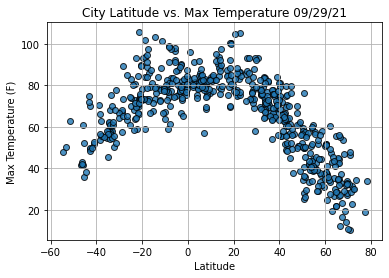

In [10]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

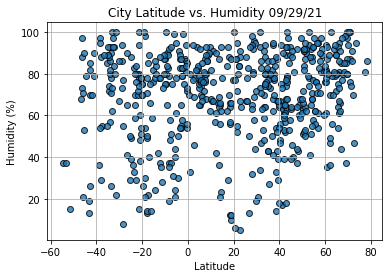

In [11]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

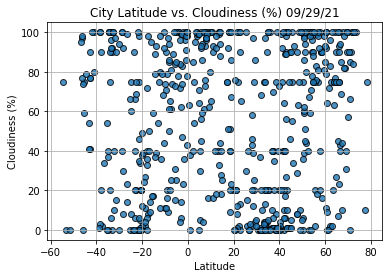

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

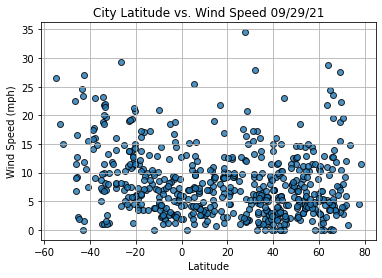

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()